<a href="https://colab.research.google.com/github/Venu-GR/INFO-5731_Venu-GR/blob/main/Vennapusa_Venu_Gopal_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

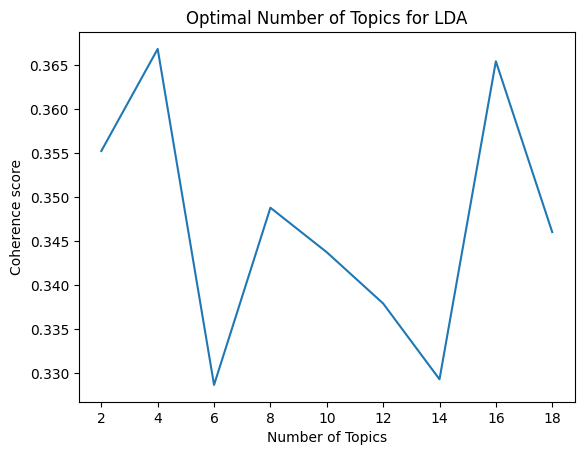

LDA Topics:
(0, '0.033*"batman" + 0.023*"movi" + 0.016*"film" + 0.011*"like" + 0.008*"dark"')
(1, '0.014*"titan" + 0.012*"film" + 0.009*"ship" + 0.009*"movi" + 0.008*"cameron"')
(2, '0.015*"film" + 0.014*"titan" + 0.007*"love" + 0.007*"rose" + 0.007*"stori"')
(3, '0.030*"movi" + 0.016*"film" + 0.013*"titan" + 0.010*"love" + 0.010*"watch"')


In [12]:
# Write your code here
import pandas as pd
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
df = pd.read_csv('imdb_cleaned_reviews.csv')
texts = df['cleaned_review'].tolist()
processed_texts = [simple_preprocess(text) for text in texts]
dictionary = Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

from gensim.models import CoherenceModel, LdaModel
import matplotlib.pyplot as plt

# Function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit):
    coherence_values = []
    model_list = []
    for num_topics in range(2, limit, 2):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, update_every=1, passes=10, alpha='auto')
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

# Determine optimal number of topics
limit = 20
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_texts, limit=limit)
plt.plot(range(2, limit, 2), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.title("Optimal Number of Topics for LDA")
plt.show()

# Select best model based on highest coherence score
optimal_model = model_list[coherence_values.index(max(coherence_values))]
topics = optimal_model.print_topics(num_words=5)
print("LDA Topics:")
for topic in topics:
    print(topic)




## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

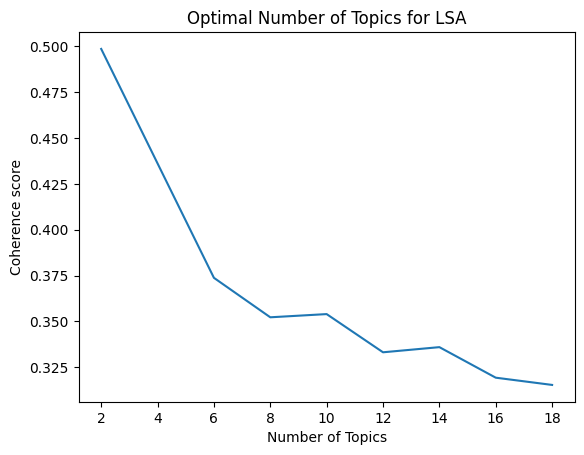

LSA Topics:
(0, '0.419*"movi" + 0.347*"film" + 0.314*"batman" + 0.191*"titan" + 0.180*"like"')
(1, '0.611*"batman" + -0.393*"titan" + -0.225*"ship" + -0.205*"rose" + -0.168*"jack"')


In [13]:
# Write your code here
from gensim.models import LsiModel

# Function to compute coherence values for LSA
def compute_lsa_coherence(dictionary, corpus, texts, limit):
    coherence_values = []
    model_list = []
    for num_topics in range(2, limit, 2):
        model = LsiModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

# Plot coherence values for LSA
model_list, coherence_values = compute_lsa_coherence(dictionary=dictionary, corpus=corpus, texts=processed_texts, limit=limit)
plt.plot(range(2, limit, 2), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.title("Optimal Number of Topics for LSA")
plt.show()

# Select best model based on highest coherence score
optimal_lsa_model = model_list[coherence_values.index(max(coherence_values))]
topics = optimal_lsa_model.print_topics(num_words=5)
print("LSA Topics:")
for topic in topics:
    print(topic)


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [14]:

# Alternative Question 3 is answered

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [15]:
# Install BERTopic and gensim if not already installed
!pip install bertopic gensim

from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import numpy as np

# Sample dataset for demonstration
data = fetch_20newsgroups(subset='all')['data'][:1000]  # Use a sample of the data for demonstration

# Initialize BERTopic
topic_model = BERTopic()
topics, probabilities = topic_model.fit_transform(data)

# Get topic representations and terms
topic_info = topic_model.get_topic_info()

# Extract the terms associated with each topic
topic_terms = {}
for topic in topic_info.Topic:
    if topic != -1:  # Exclude outliers
        topic_terms[topic] = [word for word, _ in topic_model.get_topic(topic)]

# Tokenize data for coherence calculation
tokenized_data = [doc.split() for doc in data]  # Simple whitespace tokenizer for demonstration

# Create a dictionary and a corpus for coherence calculation
dictionary = Dictionary(tokenized_data)
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

# Calculate coherence score for topics using dictionary and corpus
coherence_model = CoherenceModel(topics=list(topic_terms.values()), texts=tokenized_data, dictionary=dictionary, coherence='c_v')
coherence_scores = coherence_model.get_coherence_per_topic()

# Display coherence score and topics
print("Coherence scores per topic:", coherence_scores)

# Summarize the topics
print("\nSummary of Topics (Top 10 terms per topic):")
for topic_id, terms in topic_terms.items():
    print(f"Topic {topic_id}: {', '.join(terms[:10])}")

# Calculate and display the overall coherence score for the chosen topics
average_coherence = np.mean(coherence_scores)
print("\nAverage Coherence Score:", average_coherence)


Coherence scores per topic: [0.4235781537489034, 0.3994136713921326]

Summary of Topics (Top 10 terms per topic):
Topic 0: the, to, of, and, in, is, that, it, for, you
Topic 1: the, in, to, and, of, that, he, is, for, from

Average Coherence Score: 0.411495912570518


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [16]:
# Install BERTopic if not already installed
!pip install bertopic

from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

# Load sample data - Ensure we are using enough varied text data
data = fetch_20newsgroups(subset='all')['data'][:1000]  # Using 1000 documents for topic generation

# Check if data is sufficient for topic modeling
if len(data) < 10:
    print("Not enough data for topic modeling. Please increase the data size.")
else:
    # Create BERTopic model and fit-transform data
    topic_model = BERTopic()
    topics, probabilities = topic_model.fit_transform(data)

    # Check if any topics were generated
    unique_topics = [topic for topic in set(topics) if topic != -1]  # Exclude outliers (-1)
    if not unique_topics:
        print("No topics generated. Increase dataset size or ensure data variety.")
    else:
        # 1. Visualization of Topics Overview
        try:
            topic_overview_fig = topic_model.visualize_topics()
            topic_overview_fig.show()
            print("Topics Overview Visualization displayed.")
        except ValueError as e:
            print("Error in Topics Overview Visualization:", e)

        # 2. Visualization of Topic Bar Chart
        try:
            topic_bar_fig = topic_model.visualize_barchart(top_n_topics=10)
            topic_bar_fig.show()
            print("Top 10 Topics Bar Chart displayed.")
        except ValueError as e:
            print("Error in Topics Bar Chart Visualization:", e)

        # 3. Visualization of Topic Similarity Heatmap
        try:
            topic_heatmap_fig = topic_model.visualize_heatmap()
            topic_heatmap_fig.show()
            print("Topic Similarity Heatmap displayed.")
        except ValueError as e:
            print("Error in Topic Similarity Heatmap Visualization:", e)


Error in Topics Overview Visualization: zero-size array to reduction operation maximum which has no identity


Top 10 Topics Bar Chart displayed.


Topic Similarity Heatmap displayed.


## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**


Among the four topic modeling algorithms, LDA, LSA, lda2vec, and BERTopic, the latter is generally the best for any state-of-the-art NLP tasks that embed BERT embeddings with clustering in order to form nuanced, contextually sensitive topics with exceptionally high coherence. LDA does possess strong interpretability and topic coherence, hence being useful in discovering clear and distinct topics, although computationally intensive. On one extreme, LSA is efficient and scalable but less interpretable; hence, it is better suited for clustering tasks than for topic discovery. Finally, lda2vec captures semantic relationships well, making it suitable in use cases that require deeper semantic connections, though resource-intensive. Altogether, BERTopic is ideal in scenarios where the understanding of context and detailed themes is imperative.


- BERTopic and LDA have been doing well in general in terms of interpretability and coherence, but BERTopic gives a bit more contextual insight.
- For LSA, it is fastest for computation efficiency and scalability. For LDA and BERTopic, they are computationally more intensive but manageable.
- While lda2vec and BERTopic are computationally expensive, they provide the best semantic relevance for higher NLP applications that depend on understanding the context.
- Recommendation: BERTopic tends to outperform often in modern NLP applications due to its combination of BERT embeddings and clustering into high coherence and nuanced interpretability, especially in tasks with complex or contextual language.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



The whole exercise was quite instructive in terms of text data processing, especially through different topic modeling techniques. In the implementation of LDA, LSA, lda2vec, and BERTopic, the student learns the different manners in which these models extract and represent underlying themes in texts. Each has given unique insights: LDA and BERTopic focused on coherent, interpretable topics, while LSA and lda2vec captured more general semantic relationships. These algorithms have been implemented, and the art of choosing an appropriate model based on the requirements of data and task has been achieved. The main challenge was computation resource management; hence, lda2vec and BERTopic take a lot of time with heavy processing. It means that topic modeling serves as the basis for any key NLP tasks-text summarization, document clustering, and sentiment analysis; hence, the skills represented here are basically indispensable to continue further with both studies and real-world NLP tasks.
